# Logistic Regression
## Dataset

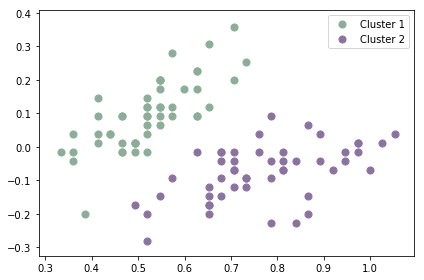

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from utils import Scaler, cluster_plot
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression


X, y = load_iris(return_X_y=True)
x_sc = Scaler()
# Select only two classes
# and rescale X
X_std = x_sc.fit_std(X[y != 2]) 
y = y[y!=2] 
cluster_plot(X_std, y)

## Manual implementation

In [114]:
class LogisticRegression:
    def __init__(self, alpha=0.00001, n_iter=30000):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for i in range(self.n_iter):
            xdotw = np.dot(X, self.w) 
            pred = self.sigmoid(xdotw)
            error = y - pred
            grad = np.dot(X.T, error)
            self.w += self.alpha * grad
        return self
            
    def predict(self, X):
        y = self.predict_proba(X)
        y = np.round(y)        
        return y
    
    def predict_proba(self, X):
        z = np.dot(X, self.w)
        return self.sigmoid(z)
    
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
        

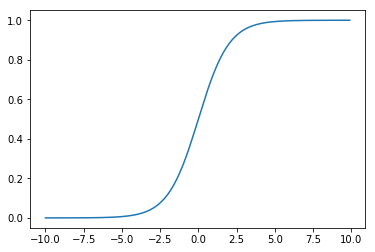

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_std, y)
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.plot(np.arange(-10, 10, 0.1), lr.sigmoid(np.arange(-10, 10, 0.1)))
plt.show()

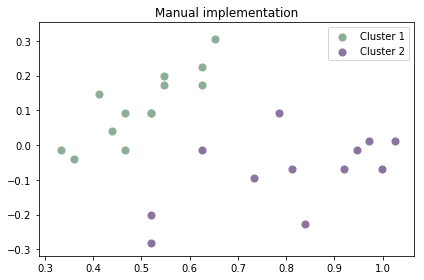

In [122]:
plt.title('Manual implementation')
cluster_plot(X_test, y_pred)

## Sklearn logistic regression

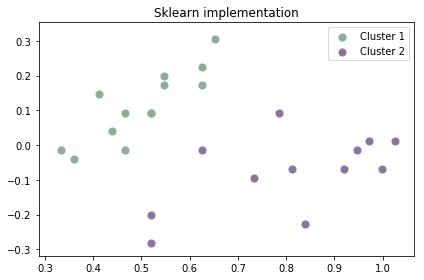

In [124]:
lr_sk = sk_LogisticRegression(tol=0.00001, solver='liblinear')
lr_sk = lr_sk.fit(X_train, y_train)
y_pred_sk = lr_sk.predict(X_test)
plt.title('Sklearn implementation')
cluster_plot(X_test, y_pred_sk)

In [126]:
man_acc = accuracy_score(y_test, y_pred)
sk_acc = accuracy_score(y_test, y_pred_sk)
print(f' Accuracy for manual implementation: {man_acc*100:.2f}%\n',
     f'Accuracy for sklearn implementation: {sk_acc*100:.2f}%')

 Accuracy for manual implementation: 100.00%
 Accuracy for sklearn implementation: 100.00%
